# Rainfall Weather Forecasting

Project Description

Weather forecasting is the application of science and technology to predict the conditions of
the atmosphere for a given location and time. Weather forecasts are made by
collecting quantitative data about the current state of the atmosphere at a given place and
using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10
years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or
not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much
rainfall could be there.

Dataset Description:
    
Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of
measure of the &quot;risk&quot;.

Dataset Link-
 https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
 https://github.com/dsrscientist/dataset3

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [2]:
df=pd.read_csv('rainfall_weather_forecasting.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df.shape

(8425, 23)

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

# REMOVING DUPLICATES

In [8]:
df['Date'].duplicated().sum()

5421

In [9]:
df['Location'].duplicated().sum()

8413

In [10]:
df['MinTemp'].duplicated().sum()

8139

In [11]:
df['MaxTemp'].duplicated().sum()

8093

In [12]:
df['Rainfall'].duplicated().sum()

8174

In [13]:
df['Evaporation'].duplicated().sum()

8308

In [14]:
df['Sunshine'].duplicated().sum()

8284

In [15]:
df['WindGustDir'].duplicated().sum()

8408

In [16]:
df['WindGustSpeed'].duplicated().sum()

8372

In [17]:
df['WindDir9am'].duplicated().sum()

8408

In [18]:
df['WindDir3pm'].duplicated().sum()

8408

In [19]:
df['Cloud9am'].duplicated().sum()

8415

In [20]:
df['Cloud3pm'].duplicated().sum()

8415

In [21]:
df['Temp9am'].duplicated().sum()

8120

In [22]:
df['Temp3pm'].duplicated().sum()

8096

In [23]:
df['RainToday'].duplicated().sum()

8422

In [24]:
df['RainTomorrow'].duplicated().sum()

8422

In [25]:
df1=df.drop_duplicates()
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df1.duplicated().sum()

0

In [27]:
df1.shape

(6762, 23)

In [28]:
df1.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# CONVERTING OBJECT DATAS

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [30]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [31]:
df1.dtypes

Date             float64
Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [32]:
df1.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

# FILLING NULL DATAS

In [33]:
for i in df1.columns:
    df1[i].fillna(np.mean(df1[i]),inplace=True)

In [34]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# CONVERTING FLOAT DATAS

In [35]:
for i in df1.columns:
    if df1[i].dtypes=='float':
        df1[i]=df1[i].astype('int')  

In [36]:
df1.dtypes

Date             int32
Location         int32
MinTemp          int32
MaxTemp          int32
Rainfall         int32
Evaporation      int32
Sunshine         int32
WindGustDir      int32
WindGustSpeed    int32
WindDir9am       int32
WindDir3pm       int32
WindSpeed9am     int32
WindSpeed3pm     int32
Humidity9am      int32
Humidity3pm      int32
Pressure9am      int32
Pressure3pm      int32
Cloud9am         int32
Cloud3pm         int32
Temp9am          int32
Temp3pm          int32
RainToday        int32
RainTomorrow     int32
dtype: object

# DATA VISUALIZATION

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

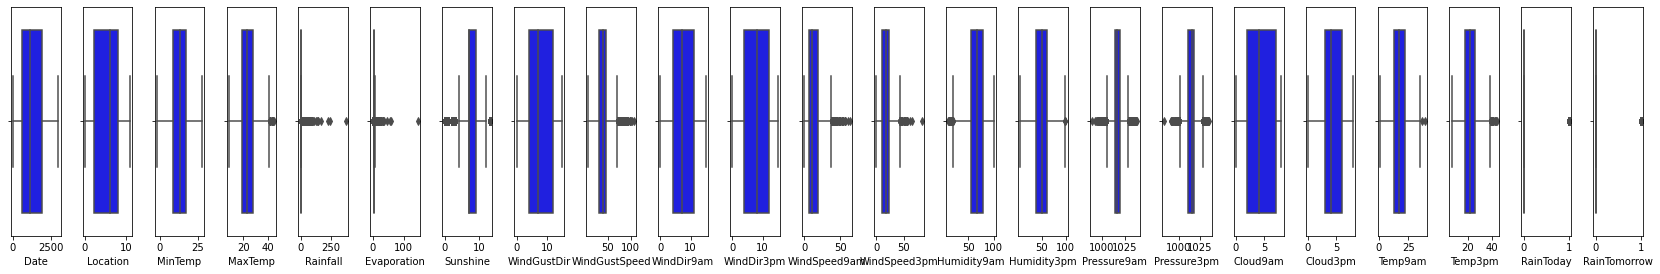

In [38]:
collist=df1.columns.values
ncol=50
nrows=40
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='blue')
    plt.tight_layout()

THE ABOVE GIVES A CLEAR VIEW OF THE COLUMNS 

Date                AxesSubplot(0.125,0.657941;0.065678x0.222059)
Location         AxesSubplot(0.203814,0.657941;0.065678x0.222059)
MinTemp          AxesSubplot(0.282627,0.657941;0.065678x0.222059)
MaxTemp          AxesSubplot(0.361441,0.657941;0.065678x0.222059)
Rainfall         AxesSubplot(0.440254,0.657941;0.065678x0.222059)
Evaporation      AxesSubplot(0.519068,0.657941;0.065678x0.222059)
Sunshine         AxesSubplot(0.597881,0.657941;0.065678x0.222059)
WindGustDir      AxesSubplot(0.676695,0.657941;0.065678x0.222059)
WindGustSpeed    AxesSubplot(0.755508,0.657941;0.065678x0.222059)
WindDir9am       AxesSubplot(0.834322,0.657941;0.065678x0.222059)
WindDir3pm          AxesSubplot(0.125,0.391471;0.065678x0.222059)
WindSpeed9am     AxesSubplot(0.203814,0.391471;0.065678x0.222059)
WindSpeed3pm     AxesSubplot(0.282627,0.391471;0.065678x0.222059)
Humidity9am      AxesSubplot(0.361441,0.391471;0.065678x0.222059)
Humidity3pm      AxesSubplot(0.440254,0.391471;0.065678x0.222059)
Pressure9a

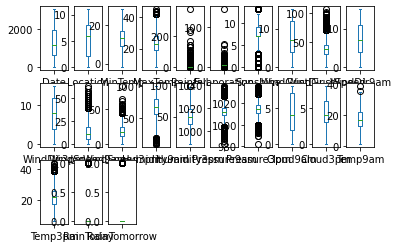

In [39]:
df1.plot(kind='box',subplots=True,layout=(3,10))

THE ABOVE SHOWS THAT THERE ARE MORE OUTLIERS.

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

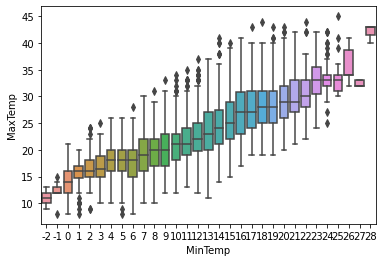

In [40]:
sns.boxplot(data=df1,x='MinTemp',y='MaxTemp')

THE ABOVE COMPARES BETWEEN MINTEMP AND MAXTEMP COLUMNS

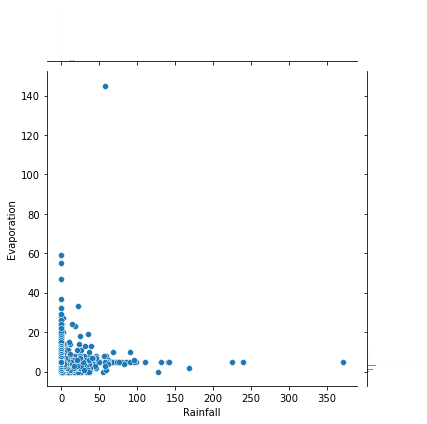

In [41]:
sns.jointplot(df1['Rainfall'],df1['Evaporation'])

THE ABOVE JOINTLY COMPARES RAINFALL AND EVAPORATION

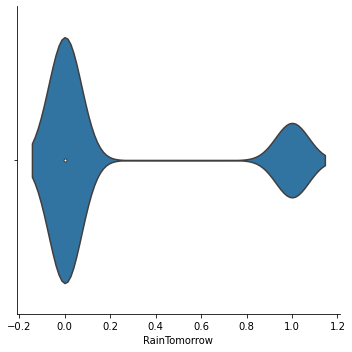

In [42]:
sns.catplot(data=df1,x='RainTomorrow',kind='violin')

THE ABOVE SHOWS DISTRIBUTION OF RAINTOMORROW COLUMN

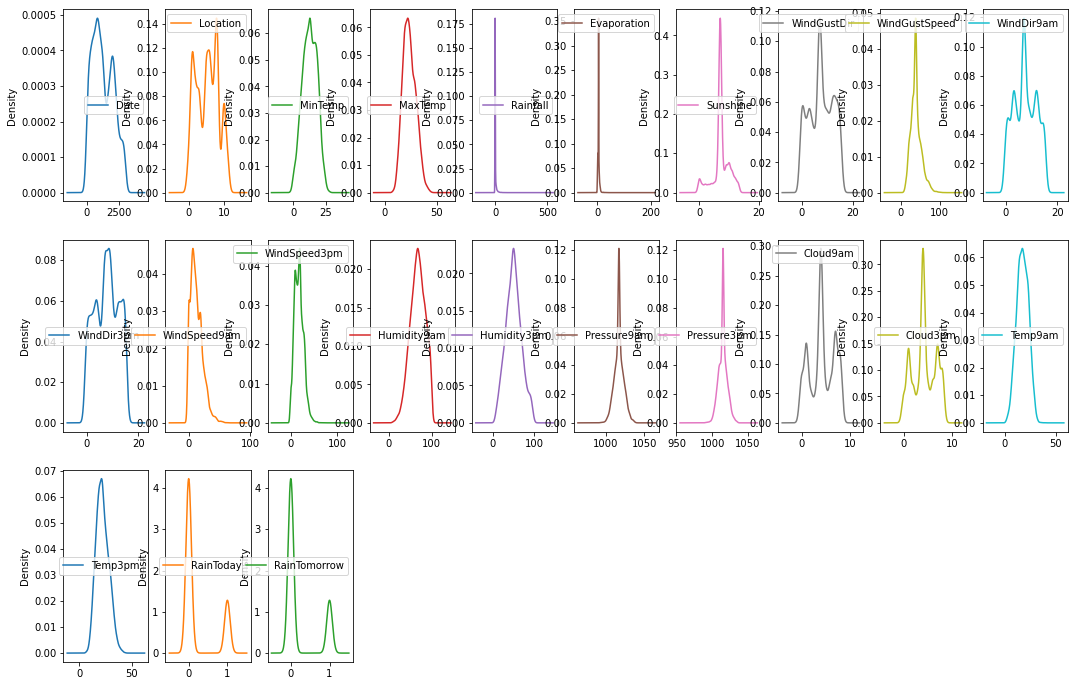

In [43]:
df1.plot(figsize=(18,12),kind='density',subplots=True,layout=(3,10),legend=True,sharex=False ) 
plt.show()

THE ABOVE SHOWS THE DENSITY OF ALL THE COLUMNS

<AxesSubplot:ylabel='Count'>

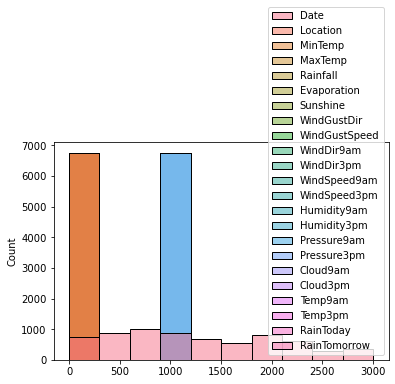

In [44]:
sns.histplot(data=df1,bins=10)

THE ABOVE SHOWS THE HIST DISTRIBUTION OF ALL THE COLUMNS

# MORE EDA

In [45]:
df1.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,...,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,1279.871636,5.323721,12.672286,23.658089,2.639308,4.955191,7.247264,7.585626,38.841467,7.482993,...,67.502514,50.460515,1017.140195,1014.730405,4.243863,4.230701,17.450163,22.267968,0.232476,0.232476
std,795.301286,3.099455,5.531315,6.137187,10.423720,3.356751,2.732803,4.513729,13.380741,4.312394,...,17.182759,18.498424,6.031018,5.974871,2.479225,2.327755,5.727837,5.971986,0.422442,0.422442
min,0.000000,0.000000,-2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.000000,982.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000
25%,622.000000,2.250000,9.000000,19.000000,0.000000,4.000000,7.000000,4.000000,30.000000,4.000000,...,56.000000,38.000000,1014.000000,1011.000000,2.000000,3.000000,13.000000,18.000000,0.000000,0.000000
50%,1160.000000,6.000000,13.000000,23.000000,0.000000,5.000000,7.000000,7.000000,38.000000,7.000000,...,68.000000,50.000000,1017.000000,1015.000000,4.000000,4.000000,17.000000,22.000000,0.000000,0.000000
75%,1955.000000,8.000000,17.000000,28.000000,1.000000,5.000000,9.000000,12.000000,46.000000,11.000000,...,80.000000,62.000000,1020.000000,1018.000000,7.000000,6.000000,22.000000,26.000000,0.000000,0.000000
max,3003.000000,11.000000,28.000000,45.000000,371.000000,145.000000,13.000000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.000000,44.000000,1.000000,1.000000


OBSERVATIONS:
    
    1)DATE,RAINFALL,MAXTEMP,SUNSHINE,WINDGUSTDIR,WINDGUSTSPEED,WINDDIR9AM,ETC HAVE LEFT SKEWED DATAS.
    
    2)LOCATION,MINTEMP,EVAPORATION,HUMIDITY9AM,PRESSURE3PM HAVE RIGHT SKEWED DATAS.
    
    3)AND ALMOST ALL THE COLUMNS HAVE OUTLIERS AS THEIR 75% AND MAX ARE DIFFERENT
    

In [46]:
df1.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.493263,0.007022,0.064314,-0.008961,0.143027,0.035145,-0.029807,-0.030944,-0.019126,...,0.069352,-0.041860,0.028203,0.032941,-0.020153,-0.023581,0.028048,0.072475,-0.015663,-0.015222
Location,0.493263,1.000000,0.090788,0.072433,-0.003898,0.138695,0.063575,-0.050429,0.257604,-0.106324,...,-0.033729,-0.001569,-0.039000,-0.021132,-0.004077,-0.005802,0.098631,0.065775,-0.004280,-0.004506
MinTemp,0.007022,0.090788,1.000000,0.726542,0.091852,0.267082,0.055900,-0.162672,0.242292,-0.068590,...,-0.154791,0.067552,-0.438432,-0.440896,0.105736,0.059783,0.889687,0.695486,0.073943,0.097554
MaxTemp,0.064314,0.072433,0.726542,1.000000,-0.084059,0.344380,0.365106,-0.236467,0.166634,-0.230503,...,-0.424566,-0.429138,-0.336405,-0.413403,-0.242197,-0.237140,0.864583,0.972376,-0.225433,-0.160054
Rainfall,-0.008961,-0.003898,0.091852,-0.084059,1.000000,0.001419,-0.182581,0.044886,0.088261,0.089604,...,0.222389,0.237755,-0.070844,-0.033698,0.195514,0.162383,-0.001321,-0.086359,0.448651,0.219606
Evaporation,0.143027,0.138695,0.267082,0.344380,0.001419,1.000000,0.260991,-0.094598,0.160744,-0.085212,...,-0.242994,-0.189062,-0.200604,-0.213855,-0.073954,-0.122247,0.314504,0.337761,-0.113333,-0.077557
Sunshine,0.035145,0.063575,0.055900,0.365106,-0.182581,0.260991,1.000000,-0.120569,0.019662,-0.095027,...,-0.397819,-0.446250,-0.003988,-0.061337,-0.548531,-0.563507,0.255384,0.382051,-0.254278,-0.343705
WindGustDir,-0.029807,-0.050429,-0.162672,-0.236467,0.044886,-0.094598,-0.120569,1.000000,0.012952,0.384182,...,0.077966,0.080947,-0.117605,-0.030737,0.102847,0.081963,-0.187094,-0.250466,0.130889,0.050218
WindGustSpeed,-0.030944,0.257604,0.242292,0.166634,0.088261,0.160744,0.019662,0.012952,1.000000,-0.123031,...,-0.271710,-0.097885,-0.391246,-0.365210,0.020529,0.065552,0.221786,0.130258,0.085752,0.184478
WindDir9am,-0.019126,-0.106324,-0.068590,-0.230503,0.089604,-0.085212,-0.095027,0.384182,-0.123031,1.000000,...,0.095227,0.158745,-0.003258,0.078233,0.097456,0.067108,-0.128437,-0.236160,0.166094,0.038219


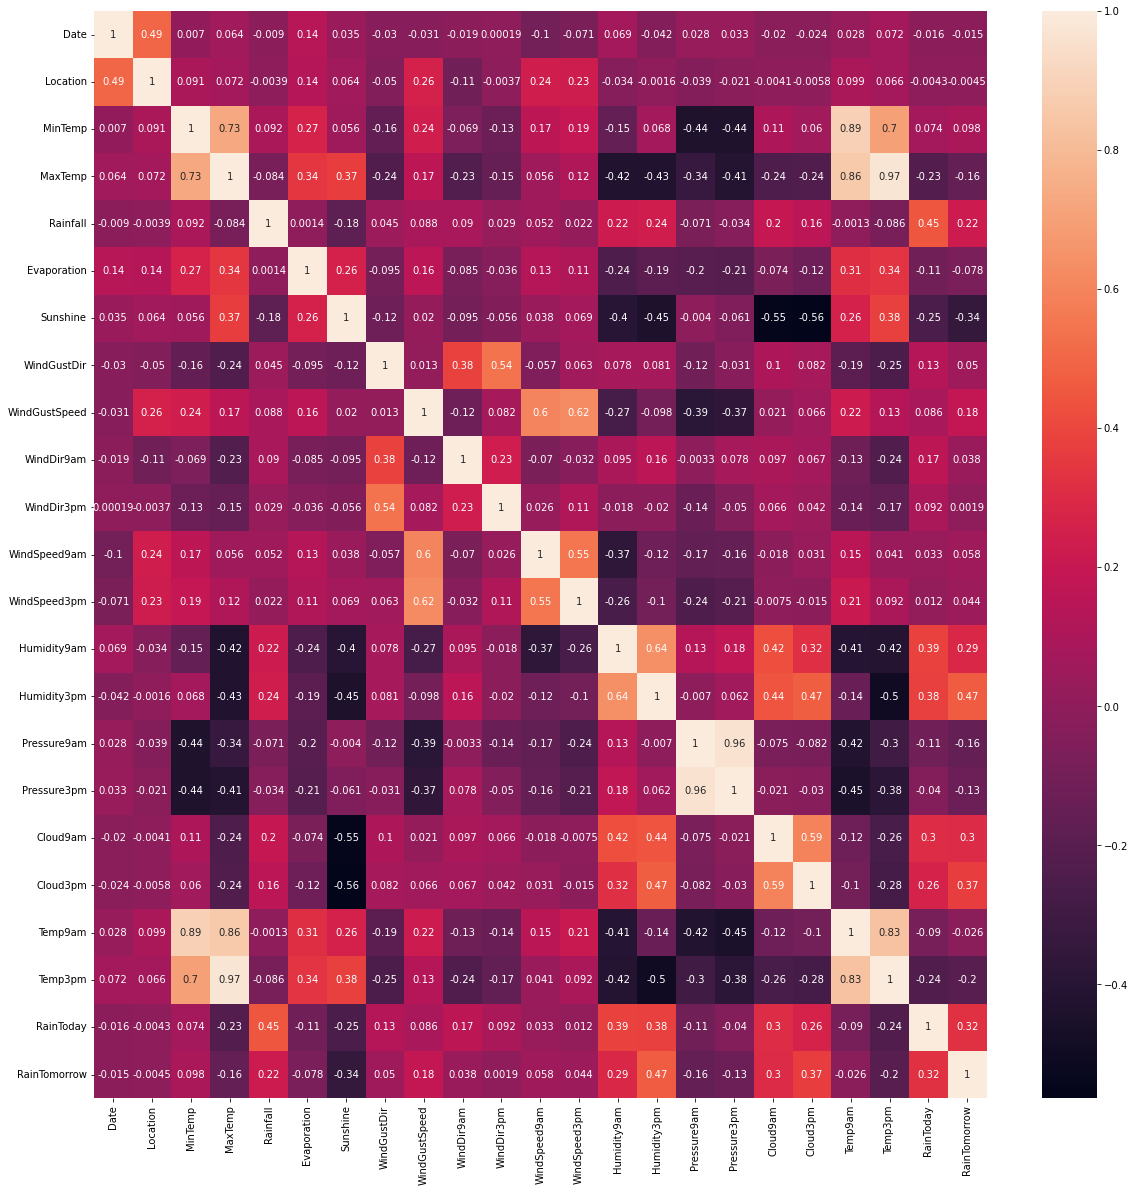

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

WE FIND MANY COLUMNS HAVE MULTICOLLINEARITY

In [48]:
df1.skew()

Date              0.324136
Location         -0.000009
MinTemp          -0.076106
MaxTemp           0.325389
Rainfall         13.855427
Evaporation      13.478854
Sunshine         -0.559042
WindGustDir      -0.056397
WindGustSpeed     0.810179
WindDir9am        0.025496
WindDir3pm       -0.066870
WindSpeed9am      0.959181
WindSpeed3pm      0.552405
Humidity9am      -0.255468
Humidity3pm       0.151933
Pressure9am       0.041691
Pressure3pm       0.009394
Cloud9am         -0.102036
Cloud3pm         -0.045508
Temp9am          -0.047980
Temp3pm           0.348449
RainToday         1.266937
RainTomorrow      1.266937
dtype: float64

SKEW IS REMOVED

# REMOVING OUTLIERS

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [50]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13,22,0,5,7,13,44,13,...,71,22,1007,1007,8,4,16,21,0,0
1,1,1,7,25,0,5,7,14,44,6,...,44,25,1010,1007,4,4,17,24,0,0
2,2,1,12,25,0,5,7,15,46,13,...,38,30,1007,1008,4,2,21,23,0,0
3,3,1,9,28,0,5,7,4,24,9,...,45,16,1017,1012,4,4,18,26,0,0
4,4,1,17,32,1,5,7,13,41,1,...,82,33,1010,1006,7,8,17,29,0,0


In [51]:
dfnew.skew()

Date             0.321415
Location         0.003872
MinTemp         -0.071468
MaxTemp          0.267283
Rainfall         3.592158
Evaporation      0.711949
Sunshine        -0.557568
WindGustDir     -0.062590
WindGustSpeed    0.511568
WindDir9am       0.008103
WindDir3pm      -0.068445
WindSpeed9am     0.681403
WindSpeed3pm     0.345713
Humidity9am     -0.231663
Humidity3pm      0.158432
Pressure9am      0.095071
Pressure3pm      0.052151
Cloud9am        -0.089682
Cloud3pm        -0.029913
Temp9am         -0.071033
Temp3pm          0.294931
RainToday        1.334931
RainTomorrow     1.332764
dtype: float64

# SPLITTING X AND Y

In [52]:
x=dfnew.drop('RainTomorrow',axis=1)
y=dfnew['RainTomorrow']

In [53]:
x.shape

(6410, 22)

In [54]:
y.shape

(6410,)

# WORKING ON MULTICOLLINEARITY

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [56]:
def vif_calc():
    vif=pd.DataFrame() 
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['FEATURES']=x.columns
    print(vif)

In [57]:
vif_calc()

       VIF Factor       FEATURES
0        0.587634           Date
1        6.339223       Location
2       53.348943        MinTemp
3      384.370508        MaxTemp
4        2.183963       Rainfall
5        8.658161    Evaporation
6       16.730638       Sunshine
7        6.310597    WindGustDir
8       22.016180  WindGustSpeed
9        5.337948     WindDir9am
10       6.079828     WindDir3pm
11       5.798515   WindSpeed9am
12       8.780260   WindSpeed3pm
13      68.285968    Humidity9am
14      45.306871    Humidity3pm
15 -165732.107117    Pressure9am
16 -169085.776654    Pressure3pm
17       7.689887       Cloud9am
18       8.070133       Cloud3pm
19     172.088009        Temp9am
20     444.699983        Temp3pm
21       2.749821      RainToday


# BALANCING X AND Y

In [58]:
from sklearn.preprocessing import power_transform

In [59]:
newx=power_transform(x)
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-2.429656,-1.455705,0.086086,-0.210603,-0.577784,0.165642,-0.177984,1.162404,0.553266,1.232539,...,0.781228,0.169847,-1.616573,-3.608225e-16,-1.393308,1.475724,-0.041805,-0.244749,-0.150041,-0.534898
1,-2.408879,-1.455705,-1.005019,0.285105,-0.577784,0.165642,-0.177984,1.356108,0.553266,-0.284040,...,0.584654,-1.374907,-1.427879,-2.498002e-16,-1.393308,-0.041944,-0.041805,-0.069138,0.355466,-0.534898
2,-2.392266,-1.455705,-0.093740,0.285105,-0.577784,0.165642,-0.177984,1.547340,0.702779,1.232539,...,0.973118,-1.689291,-1.122551,-3.608225e-16,-1.213284,-0.041944,-0.924673,0.633975,0.190519,-0.534898
3,-2.377886,-1.455705,-0.637759,0.753511,-0.577784,0.165642,-0.177984,-0.746398,-1.179383,0.393186,...,-0.860937,-1.321355,-2.009609,-2.775558e-17,-0.498144,-0.041944,-0.041805,0.106544,0.675730,-0.534898
4,-2.364967,-1.455705,0.799232,1.342554,1.258777,0.165642,-0.177984,1.162404,0.322608,-1.592691,...,0.382858,0.849974,-0.944061,-2.498002e-16,-1.573833,1.107970,1.577831,-0.069138,1.134615,-0.534898


In [60]:
dfx.shape

(6410, 22)

In [61]:
y.value_counts()

0    4982
1    1428
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

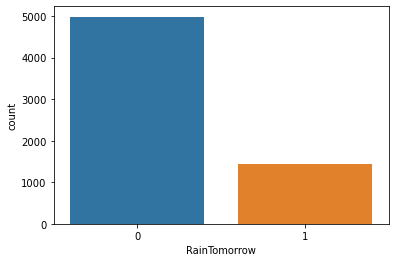

In [62]:
sns.countplot(y)

In [63]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xnew,ynew=smt.fit_resample(dfx,y)

In [64]:
ynew.value_counts()

0    4982
1    4982
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

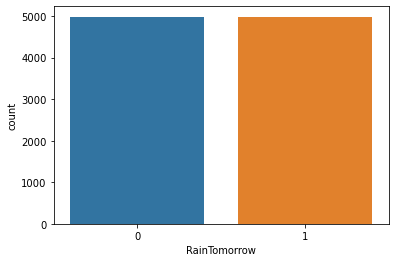

In [65]:
sns.countplot(ynew)

# TRAINING ANS TESTING

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('Accuracy_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS) 

Accuracy_score of LogisticRegression  0.7882589061716005 at random_state  0
Mac acc score of lr  78.82589061716006 at random_state  0
Accuracy_score of LogisticRegression  0.7782237832413447 at random_state  1
Mac acc score of lr  78.82589061716006 at random_state  0
Accuracy_score of LogisticRegression  0.7842448569994982 at random_state  2
Mac acc score of lr  78.82589061716006 at random_state  0
Accuracy_score of LogisticRegression  0.7832413447064727 at random_state  3
Mac acc score of lr  78.82589061716006 at random_state  0
Accuracy_score of LogisticRegression  0.7927747114902157 at random_state  4
Mac acc score of lr  79.27747114902158 at random_state  4
Accuracy_score of LogisticRegression  0.7852483692925238 at random_state  5
Mac acc score of lr  79.27747114902158 at random_state  4
Accuracy_score of LogisticRegression  0.7812343201204215 at random_state  6
Mac acc score of lr  79.27747114902158 at random_state  4
Accuracy_score of LogisticRegression  0.7832413447064727 at ra

In [68]:
x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=904)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=accuracy_score(predlr,y_test)
print('Accuracy_score of LogisticRegression ' ,score*100)
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr,y_test))

Accuracy_score of LogisticRegression  81.33467134972403
[[804 194]
 [178 817]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       998
           1       0.81      0.82      0.81       995

    accuracy                           0.81      1993
   macro avg       0.81      0.81      0.81      1993
weighted avg       0.81      0.81      0.81      1993



# TUNING LOGISTIC REGRESSION

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscvlr=GridSearchCV(estimator=lr,param_grid=parameters)
gscvlr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [71]:
print(gscvlr.best_params_)

{'C': 10}


In [72]:
lr1=LogisticRegression(C=10)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  81.33467134972403


SINCE LOGISTIC REGRESSION GIVES LOW RESULTS WE CAN TRY FOR MORE MODELS

# TESTING MORE MODELS

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [74]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100)

Accuracy_score of model  KNeighborsClassifier() is =  85.80030105368792
Accuracy_score of model  GradientBoostingClassifier() is =  87.85750125439037
Accuracy_score of model  AdaBoostClassifier() is =  83.64274962368289
Accuracy_score of model  ExtraTreesClassifier() is =  92.27295534370296
Accuracy_score of model  RandomForestClassifier() is =  91.921726041144
Accuracy_score of model  DecisionTreeClassifier() is =  83.74310085298545
Accuracy_score of model  SVC() is =  85.04766683391871


# CROSS-VALIDATION

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc,svc]
        for j in models:
            j.fit(x_train,y_train)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train,y_train,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  85.80030105368792
Cross validation of model  KNeighborsClassifier() is equal ==  0.8149534348891132 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.0430495756477659
Accuracy_score of model  GradientBoostingClassifier() is equal ==  87.85750125439037
Cross validation of model  GradientBoostingClassifier() is equal ==  0.8473219001763386 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  0.03125311236756512
Accuracy_score of model  AdaBoostClassifier() is equal ==  83.64274962368289
Cross validation of model  AdaBoostClassifier() is equal ==  0.8109395745838163 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.025487921653012613
Accuracy_score of model  ExtraTreesClassifier() is equal ==  92.72453587556447
Cross validation of model  ExtraTreesClassifier(

# HYPERTUNING

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_etc=GridSearchCV(estimator=etc,param_grid=parameters)
gscv_etc.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [79]:
print(gscv_etc.best_score_)
print(gscv_etc.best_params_)
print(gscv_etc.best_estimator_)

0.7334094547342505
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
ExtraTreesClassifier(max_depth=3, max_features='log2', n_estimators=50)


In [80]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=parameters)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [81]:
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)
print(gscv_rfc.best_estimator_)

0.7776939384761823
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}
RandomForestClassifier(max_depth=3, max_features='auto')


In [82]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_gbc=GridSearchCV(estimator=gbc,param_grid=parameters)
gscv_gbc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [83]:
print(gscv_gbc.best_score_)
print(gscv_gbc.best_params_)
print(gscv_gbc.best_estimator_)

0.8835783089406591
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}
GradientBoostingClassifier(criterion='squared_error', max_features='auto',
                           n_estimators=200)


In [84]:
svc=SVC()
kernel_value={'kernel':['rbf','linear','poly']}

In [85]:
gscv_svc=GridSearchCV(estimator=svc,param_grid=kernel_value)
gscv_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [86]:
print(gscv_svc.best_score_)
print(gscv_svc.best_estimator_)
print(gscv_svc.best_params_)

0.8385399794684613
SVC()
{'kernel': 'rbf'}


# ROC-CURVE

In [87]:
from sklearn.metrics import roc_curve

In [88]:
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))

In [89]:
fpr

array([0.        , 0.08350305, 1.        ])

In [90]:
tpr

array([0.        , 0.93175074, 1.        ])

In [91]:
thresholds

array([2, 1, 0])

# AS EXTRA TREES CLASSIFIER SHOWS MORE ACCURACY WE CAN CONCENTRATE ON IT 

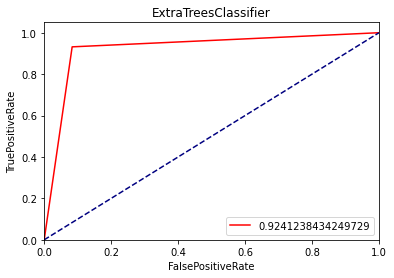

In [92]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ExtraTreesClassifier')
plt.legend(loc='lower right')
plt.show()

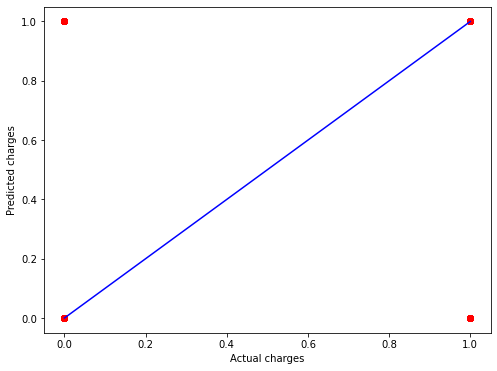

In [93]:
plt.figure(figsize=(8,6))
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.scatter(x=y_test,y=etc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.savefig('=etc-rainfall.png')
plt.show()

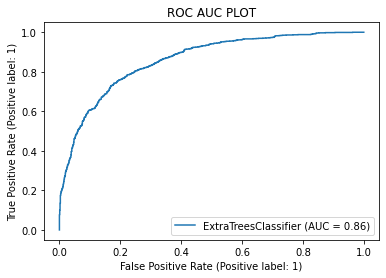

In [94]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv_etc.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

In [95]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
score=accuracy_score(y_test,predetc)
print('ACCURACY_SCORE OF THE BEST FITTED MODEL --Extra Trees Classifier',score*100)
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

ACCURACY_SCORE OF THE BEST FITTED MODEL --Extra Trees Classifier 92.77471149021575
[[907  75]
 [ 69 942]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       982
           1       0.93      0.93      0.93      1011

    accuracy                           0.93      1993
   macro avg       0.93      0.93      0.93      1993
weighted avg       0.93      0.93      0.93      1993



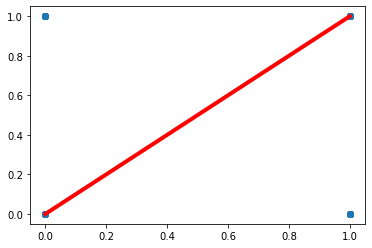

In [96]:
plt.scatter(predetc,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# FINAL COMPARISON OF ALL MODELS

In [97]:
from sklearn.metrics import roc_curve,plot_roc_curve

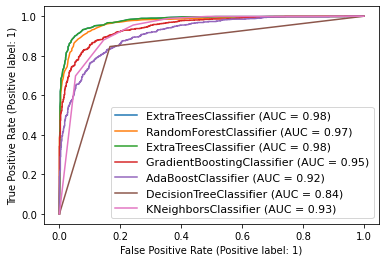

In [98]:
disp=plot_roc_curve(etc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(etc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# CONSIDERING ALL FACTORS OF TESTING WE CONCLUDE EXTRA TREES CLASSIFIER IS THE BEST FITTED MODEL SO WE CAN SAVE IT

In [99]:
import pickle
filename='rainfall_weather_forecasting.pkl'

In [100]:
pickle.dump(etc,open(filename,'wb'))

# LOADING THE SAVED MODEL

In [101]:
pickle.load(open(filename,'rb'))

ExtraTreesClassifier()